In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import sys
import os

# Get the path to the parent directory
# '..' means "go up one level"
sys.path.append(os.path.abspath(".."))

# NOW you can import the file from the parent folder
from flatness_score import calculate_flatness, get_hamming_distance, get_neighbors, generate_sequences
from flatness_score import get_fit_from_interpolation, get_fit_n_flattness, plot_fitness_vs_flatness

In [3]:
df_seqs = pd.read_csv('../data_yeast/ABF1_with_Metadata.csv')
df_seqs = df_seqs[df_seqs['Environment'] == 'YPD']
df_seqs = df_seqs['Sequence_80bp'].value_counts()
df_seqs.sort_values(ascending=False, inplace=True)

In [4]:
init_seq_list = df_seqs.index.tolist()

In [5]:
level_of_mutation = 1

for i in range(df_seqs.shape[0]):
    seq_list = [init_seq_list[i]]

    # In order to get the flatness of the neighbors we need their neighbors also
    for _ in range(level_of_mutation + 1):
        seq_list = get_neighbors(seq_list)

    with open(f"neighbors_files/output_sequences_{i}.txt", "w") as f:
        for seq in seq_list:
            f.write(seq + "\n")

Go to <a href='https://evolution-app-vbxxkl6a7a-ue.a.run.app/#upload-the-sequence-file-here'>the interface of the model</a>, change the request to `Expression` and upload sequences

In [5]:
df_curve = pd.read_csv("../abf1_regev_extdata5_digitized_curve.csv")
df_curve = df_curve.sort_values('expression')

# Sequence 0 - the most common

In [6]:
seq_num = 0  # Change this number to analyze different sequences

In [7]:
df_exp = pd.read_csv(f"neighbors_files/expression_output_df_{seq_num}.csv")
df_exp['group_id'] = np.arange(len(df_exp)) // 241
df_exp.rename(columns={'Expression': 'expression'}, inplace=True)

In [8]:
df_exp['fitness'] = get_fit_from_interpolation(df_exp, df_curve)

In [9]:
fit_flatt_list = [get_fit_n_flattness(df_exp, seq_num) for seq_num in range(241)]

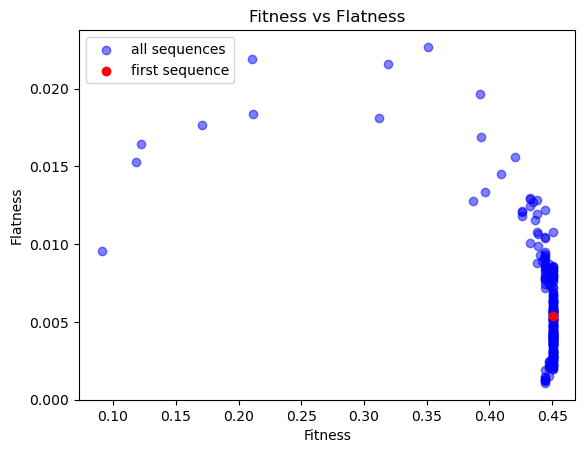

In [10]:
plot_fitness_vs_flatness(fit_flatt_list, power=6)

# Sequence 7 - the least common

In [11]:
seq_num = 7  # Change this number to analyze different sequences

In [12]:
df_exp = pd.read_csv(f"neighbors_files/expression_output_df_{seq_num}.csv")
df_exp['group_id'] = np.arange(len(df_exp)) // 241
df_exp.rename(columns={'Expression': 'expression'}, inplace=True)

In [13]:
df_exp['fitness'] = get_fit_from_interpolation(df_exp, df_curve)

In [14]:
fit_flatt_list = [get_fit_n_flattness(df_exp, seq_num) for seq_num in range(241)]

In [15]:
fit_flatt_list

[(0.873505976, 0.01217313330789769),
 (0.875498008, 0.006949790852591105),
 (0.8720656735470638, 0.012327012134312325),
 (0.875498008, 0.007106498978146876),
 (0.875498008, 0.01032295542065553),
 (0.642430279, 0.0),
 (0.642430279, 0.0),
 (0.875498008, 0.007002343862013228),
 (0.875498008, 0.00979885526607685),
 (0.873505976, 0.011824979344079114),
 (0.847773523876293, 0.020243570838559478),
 (0.875498008, 0.007295190088448463),
 (0.875498008, 0.0056548296350476665),
 (0.875498008, 0.004311106015029729),
 (0.875498008, 0.006647234099032686),
 (0.875498008, 0.004052715149553136),
 (0.875498008, 0.004660371139430247),
 (0.875498008, 0.00439533115751714),
 (0.875498008, 0.003979693388853963),
 (0.875498008, 0.003748951592908526),
 (0.875498008, 0.00404082880663295),
 (0.871513944, 0.013299072712080305),
 (0.863545817, 0.016335539027231224),
 (0.875498008, 0.0073883562976329534),
 (0.875498008, 0.006155444367937743),
 (0.875498008, 0.0055993822476777515),
 (0.875498008, 0.010771636714521264

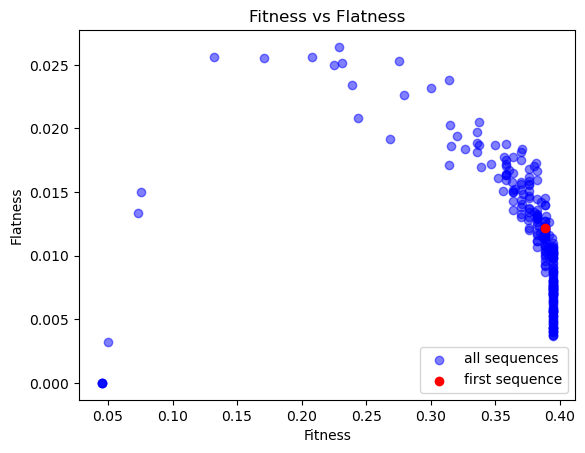

In [16]:
plot_fitness_vs_flatness(fit_flatt_list, power=7)